<h1><center><u>Escape No Game</u></center></h1>

<center><img src="https://st2.depositphotos.com/1025323/8999/i/450/depositphotos_89990792-stock-photo-signal-processing-background.jpg" alt="Alternative text" /></center>

## <center><u>Livrable 4</u> : Modélisation Numérique</center>


### <center><u>Sommaire</u></center>

#### <u>1] Reconstitution de l’ensemble de la chaîne de transmission pouvant fonctionner à partir de n’importe quelle entrée de type texte.</u><br><br>
#### <u>2] Intégration du système de détection d’erreurs dans le prototype.</u><br><br>
#### <u>3] Mise en place d’une technique de détection d’erreur dans la transmission de données numériques</u><br><br>
#### <u>4] Utilisation d’un second type de modulation</u><br><br>

### <center><u>Contexte du projet</u></center>
Le département Recherche et Développement de l'Agence AIL3C a pour mission de créer des solutions innovantes pour aider ses agents sur le terrain. Malgré leurs inventions notables telles que les masques-peaux et les cigares-pistolet, une récente mission a entraîné la perte de l'agent K57. Après avoir localisé une base de cyberpirates grâce à des signaux réseau, l'agent K57 a réussi à infiltrer la salle des serveurs mais s'est retrouvé coincé dans une salle de conférence sans accès réseau. La situation a conduit à sa découverte et à son échec. Le département est maintenant chargé de trouver une solution technique pour permettre la communication vers l'extérieur dans de telles situations, où le seul accessoire disponible était un micro connecté au système d'audioconférence, uniquement actif lors de l’utilisation de la salle.

### <center><u>Contexte du livrable 4 : </u></center> 
Notre chaîne transmission ayant été justifié et expliqué dans notre Proof-Of-Concept, nous devons maintenant passer à l’application en simulant notre chaîne numériquement via Python.

### <center><u>Objectif du livrable 4 : </u></center>  
Nous devons établir un code python intégrant les différentes étapes de la chaîne ainsi que les commentaires nécessaires pour que ce dernier soit compréhensible, puis afin d’impressionner le comité de pilotage, nous devrons intégrer 2 fonctionnalités supplémentaires parmi celles proposés :

    -> L'envoi et la reconstitution d'un message de type son.
    -> La gestion de la réception d'un signal avec bruit.
    -> L'utilisation d'une liaison half-duplex (accusé de réception).
    -> Un CRC ou un code de correction d'erreur.
    -> La simulation entre 2 PC (l'un pour la génération du son correspondant au message à envoyer, l'autre pour la réception et la reconstruction du message).
    -> La mise en œuvre d'un second type de modulation/démodulation.


## Modulation & Démodulation d'amplitude (FSK):

## <u>Documentation du Code "Modulation FSK avec Contrôle"</u>

#### Introduction
Le code présent réalise une modulation de fréquence par déplacement de fréquence (FSK) avec ajout de contrôle de parité pour la transmission d'un message. La phase d'émission implique la conversion d'un message texte en trames binaires, ajout d'un bit de parité (somme de contrôle), puis modulation FSK. La phase de réception décode le signal modulé, détecte les erreurs grâce à la somme de contrôle, puis reconstruit le message original.

#### <u>Phase d'Émission</u>

1. Entrée du Message :
    - L'utilisateur est invité à saisir un message à moduler.
    
2. Conversion en Trames Binaires :
    - Le message est converti en trames binaires de 8 bits chacune- .
    
3. Calcul de la Somme de Contrôle :
    - Une fonction calculer_somme_controle est définie pour calculer le bit de parité (somme de contrôle) de chaque trame.
    
4. Ajout de la Somme de Contrôle :
    - La somme de contrôle est ajoutée à chaque trame binaire.
    
5. Modulation FSK avec Contrôle :
    - Le signal est modulé en FSK pour chaque bit de la trame avec les fréquences correspondant à '0' et '1'.
    - La modulation est réalisée à l'aide de sinusoïdes de fréquences spécifiques.
    
6. Enregistrement du Signal Modulé :
    - Le signal modulé est enregistré dans un fichier audio.

#### <u>Phase de Réception</u>

1. Récupération du Signal :
    - Le signal sonore modulé est récupéré à partir du fichier audio.
    
2. Démodulation FSK avec Contrôle :
    - Une fonction demoduler_fsk_avec_controle est définie pour démoduler le signal FSK.
    - La corrélation entre l'échantillon reçu et les fréquences de modulation est calculée pour chaque bit.
    
3. Vérification de la Somme de Contrôle :
    - La somme de contrôle est vérifiée pour chaque trame reçue.
    
4. Reconstruction du Message :
    - Une fonction reconstruire_message_avec_controle reconstruit le message original à partir des bits reçus en vérifiant la somme de contrôle.
    
5. Affichage des Résultats :
    - Les bits reçus, les erreurs détectées et le message reconstruit sont affichés.
    
6. Affichage du Signal Reçu :
    - Un graphique du signal reçu est affiché à l'aide de la bibliothèque Matplotlib.
    
<u>Information</u>

    - Le seuil de détection est défini pour décider du bit reçu.
    - La gestion des erreurs détectées est effectuée pendant la reconstruction du message.
     
#### Utilisation
- Saisissez le message à moduler (entre 5 et 10 caractères).
- Le programme effectue la modulation, enregistre le signal, puis effectue la démodulation, vérifie la somme de contrôle, et reconstruit le message.
- Les résultats et le graphique du signal sont affichés.


### Code Modulation / Démodulation FSK

#### Bloc 1: Importation des bibliothèques
Ce bloc importe les bibliothèques nécessaires (numpy, soundfile, matplotlib.pyplot).<br>


In [86]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

#### Bloc 2 : Fonctions de modulation et émission
Dans cette section, la fonction modulation1 prend un message en entrée, le transforme en trames binaires, ajoute des bits de parité (somme de contrôle) à chaque trame, puis module ces trames en un signal sonore FSK.<br>
Le signal résultant est ensuite enregistré dans un fichier audio WAV.


In [ ]:
message = input("Message à moduler : ")  # Message à transformer en trame
if len(message) <= 10 and len(message) >= 5:
    trames = [format(ord(char), '08b') for char in message]
else:
    print("Le message est trop long ou trop court")


# Fonction pour calculer la somme de contrôle (bit de parité)
def calculer_somme_controle(trame):
    return str(sum(map(int, trame)) % 2)

# Ajouter une somme de contrôle à chaque trame
trames_avec_controle = [trame + calculer_somme_controle(trame) for trame in trames]

# Modulation des trames en signal sonore
freq_bit0 = 19900  # Fréquence pour bit 0 (au-delà de la plage d'audition humaine)
freq_bit1 = 22000  # Fréquence pour bit 1 (au-delà de la plage d'audition humaine)
echantillonage = 44100  # Taux d'échantillonnage en Hz

def moduler_fsk_avec_controle(trame):
    signal_module = []
    for bit in trame:
        if bit == '0':
            signal_module.extend(np.sin(2 * np.pi * freq_bit0 * np.arange(0, duree_bit, 1 / echantillonage)))
        elif bit == '1':
            signal_module.extend(np.sin(2 * np.pi * freq_bit1 * np.arange(0, duree_bit, 1 / echantillonage)))
    return np.array(signal_module)

# Émission du signal sonore avec contrôle
signal_emis_fsk_avec_controle = np.concatenate([moduler_fsk_avec_controle(trame) for trame in trames_avec_controle])
sf.write('signal_emis_avec_controle.wav', signal_emis_fsk_avec_controle, echantillonage)


plt.plot(signal_emis_fsk_avec_controle[:500])
plt.title('Échantillon du Signal Émis (FSK avec contrôle)')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude')
plt.show()

#### Bloc 3: Phase de réception - Récupération du signal sonore
Ce bloc récupère le signal sonore enregistré et le taux d'échantillonnage associé.



In [ ]:
# Je récupère le signal sonore
signal_recu, taux_echantillonnage = sf.read('signal_emis_avec_controle.wav')

#### Bloc 4 : Démodulation FSK avec contrôle
Ce bloc définit la fonction demoduler_fsk_avec_controle qui prend le signal reçu en entrée et effectue la démodulation FSK avec contrôle. Les bits reçus sont stockés dans la liste bits_recus_avec_controle.

In [89]:
# Démodulation FSK avec contrôle
def demoduler_fsk_avec_controle(signal_recu):
    bits_recus = []
    seuil_detection = 0.5

    for i in range(0, len(signal_recu), int(duree_bit * taux_echantillonnage)):
        echantillon = signal_recu[i:i + int(duree_bit * taux_echantillonnage)]

        # Calculer la corrélation entre l'échantillon et les fréquences de modulation
        corrélation_bit0 = np.abs(np.correlate(echantillon, np.sin(2 * np.pi * freq_bit0 * np.arange(0, duree_bit, 1 / taux_echantillonnage)), mode='valid'))
        corrélation_bit1 = np.abs(np.correlate(echantillon, np.sin(2 * np.pi * freq_bit1 * np.arange(0, duree_bit, 1 / taux_echantillonnage)), mode='valid'))

        # Décider du bit en fonction de la corrélation maximale
        bit_recu = '0' if np.max(corrélation_bit0) > seuil_detection * np.max(corrélation_bit1) else '1'
        bits_recus.append(bit_recu)

    return bits_recus

#### Bloc 5 : Vérification des erreurs
Ce bloc complète la vérification des erreurs en reconstruisant les trames reçues, enlevant le dernier bit qui est la somme de contrôle, puis comparant la somme de contrôle attendue avec celle reçue.

In [90]:
# Utilisation de la démodulation FSK avec contrôle
bits_recus_avec_controle = demoduler_fsk_avec_controle(signal_recu)
trames_recues_avec_controle = [''.join(bits_recus_avec_controle[i:i+9]) for i in range(0, len(bits_recus_avec_controle), 9)]
messages_recus_avec_controle = [trame[:-1] for trame in trames_recues_avec_controle]  # Enlever le dernier bit qui est la somme de contrôle

# Vérifier les erreurs
erreurs_detectees = [trame[-1] != calculer_somme_controle(trame[:-1]) for trame in trames_recues_avec_controle]

#### Bloc 6: Reconstruction du message
Ce bloc complète la fonction reconstruire_message_avec_controle, qui prend les bits reçus, vérifie la somme de contrôle pour chaque trame, et reconstruit le message en évitant les trames avec des erreurs. Le message reconstruit est ensuite stocké dans la variable message_reconstruit_avec_controle.

In [91]:
def reconstruire_message_avec_controle(bits_recus):
    # Vérifier la somme de contrôle pour chaque trame
    trames_recues = [''.join(bits_recus[i:i+9]) for i in range(0, len(bits_recus), 9)]

    # Enlever le dernier bit qui est la somme de contrôle
    messages_recus = [trame[:-1] for trame in trames_recues]

    # Vérifier les erreurs et construire le message
    message_reconstruit = ''
    for i, trame in enumerate(trames_recues):
        somme_controle_attendue = calculer_somme_controle(trame[:-1])
        if trame[-1] == somme_controle_attendue:
            message_reconstruit += chr(int(trame[:-1], 2))
        else:
            print(f"Erreur détectée dans la trame {i + 1}. La somme de contrôle ne correspond pas.")

    return message_reconstruit

bits_recus_avec_controle = demoduler_fsk_avec_controle(signal_recu)
message_reconstruit_avec_controle = reconstruire_message_avec_controle(bits_recus_avec_controle)

#### Bloc 7 : Affichage des résultats 
Affiche les résultats de la réception ainsi que le tracé du signal reçu

Bits reçus (avec contrôle) : ['0', '1', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0']
Erreurs détectées (True si erreur, False sinon) : [False, False, False, False, False, False, False]
Message reçu: bonjour


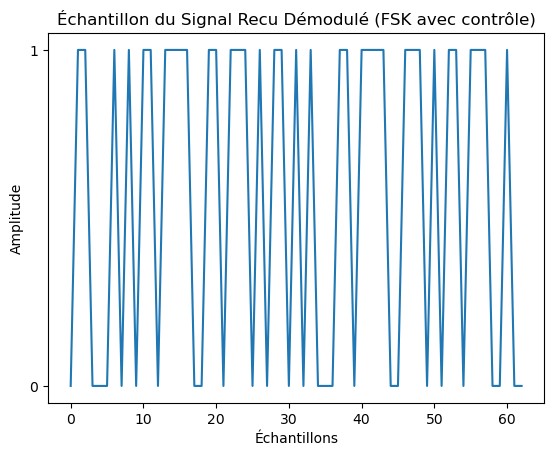

In [92]:
print("Bits reçus (avec contrôle) :", bits_recus_avec_controle)
print("Erreurs détectées (True si erreur, False sinon) :", erreurs_detectees)
print("Message reçu:", message_reconstruit_avec_controle)

plt.plot(bits_recus_avec_controle[:500])
plt.title('Échantillon du Signal Recu Démodulé (FSK avec contrôle)')
plt.xlabel('Échantillons')
plt.ylabel('Amplitude')
plt.show()

## Modulation & Démodulation d'amplitude (ASK):

## <u>Documentation du Code "Modulation ASK avec Contrôle"</u>

#### Introduction
Ce code est un script Python qui illustre le processus de modulation en amplitude ASK (Amplitude Shift Keying) avec encodage en Manchester d'un message texte. Le script génère également un fichier audio du signal modulé et le décode pour récupérer le message d'origine.<br><br>

##### 1] Le code est divisé en plusieurs étapes distinctes : 

##### 1.1] Encodage du message en Manchester : 

=> La première étape consiste à lire un message texte à partir d'un fichier, le convertir en binaire ASCII, ajouter un code de vérification CRC, puis encoder ce message en Manchester. Ces étapes sont réalisées par les fonctions suivantes : 

    - ascii_en_binaire: Convertit le message ASCII en binaire.
    
    - ajouter_crc: Ajoute un code de vérification CRC (Cyclic Redundancy Check) au message binaire.
    
    - encoder_manchester: Encode le message binaire en utilisant la modulation de Manchester.


##### 1.2] Modulation ASK (Amplitude Shift Keying)

La deuxième étape consiste à moduler le signal en amplitude ASK en utilisant le signal de la porteuse. Les paramètres tels que la fréquence de la porteuse, le taux d'échantillonnage, et d'autres sont définis ici. Les fonctions impliquées dans cette étape sont :

    - générer_signal_audio: Génère le signal audio modulé en utilisant ASK.
    
    - enregistrer_audio: Enregistre le signal audio modulé dans un fichier.


##### 1.3] Démodulation ASK et Décodage

La troisième étape consiste à démoduler le signal audio ASK, puis à décoder le message binaire. Les étapes spécifiques comprennent :

    - La démodulation ASK du signal audio.
    
    - Le décodage du message binaire démodulé en utilisant la modulation de Manchester.
    
    - La vérification de l'intégrité du message à l'aide du CRC.
    
##### 1.4]  Affichage des Résultats

Enfin, le code affiche le signal modulé, la porteuse, et le signal ASK modulé dans trois sous-graphiques distincts.

##### 2] Execution du code 

Le script doit être exécuté avec Python. Lors de l'exécution, l'utilisateur sera invité à saisir le message à moduler. Le message doit avoir une longueur comprise entre 5 et 10 caractères inclus. Si la longueur du message n'est pas valide, un message d'erreur est affiché.


##### 3] Résultats Affichés 

Le script affiche trois graphiques représentant le message dupliqué, la porteuse, et le signal modulé en ASK. De plus, il génère un fichier audio "ASK.wav" contenant le signal modulé. Enfin, le script affiche le message d'origine décodé à partir du signal démodulé, et il vérifie l'intégrité du message à l'aide du CRC.

#### Utilisation
- Saisissez le message dans un fichier .txt dans le répertoire spécifié
- Le programme effectue la modulation, enregistre le signal, puis effectue la démodulation, vérifie et corrige les potentielles erreurs (CRC), et reconstruit le message.
- Les résultats et le graphique du signal sont affichés.

### Code Modulation / Démodulation ASK

#### Bloc 1: Importation des Bibliothèques

Dans ce bloc, nous importons les bibliothèques nécessaires pour effectuer différentes opérations. numpy est utilisé pour les calculs numériques, matplotlib.pyplot pour les graphiques, soundfile pour la manipulation de fichiers audio, et binascii pour les opérations binaires ASCII.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import binascii

#### Bloc 2: Définition des Fonctions

Ce bloc définit plusieurs fonctions utilisées tout au long du script :

    - ascii_en_binaire: Convertit une chaîne de caractères ASCII en une chaîne binaire.
    
    - encoder_manchester: Encode une chaîne binaire en utilisant la modulation de Manchester.
    
    - générer_signal_audio: Génère un signal audio modulé (ASK).
    
    - enregistrer_audio: Enregistre le signal audio dans un fichier.
    
    - ajouter_crc: Ajoute un code de vérification CRC à une chaîne binaire.

In [ ]:
def ascii_en_binaire(ascii_string):
    return ''.join(format(ord(char), '08b') for char in ascii_string)

def encoder_manchester(chaine_binaire):
    manchester_encodé = ''
    for bit in chaine_binaire:
        if bit == '0':
            manchester_encodé += '01'
        elif bit == '1':
            manchester_encodé += '10'
    return manchester_encodé

def générer_signal_audio(t, ASK):
    audio_signal = ASK  
    Fs = 44100
    return audio_signal, Fs

def enregistrer_audio(chemin_fichier, audio_signal, Fs):
    sf.write(chemin_fichier, audio_signal, Fs)

def ajouter_crc(chaine_binaire):
    crc32 = binascii.crc32(chaine_binaire.encode())
    crc_binaire = format(crc32, '032b')
    return chaine_binaire + crc_binaire

#### Bloc 3: Lecture du Fichier et Préparation du Message

Dans ce bloc, le script lit le contenu d'un fichier texte, convertit ce contenu en binaire ASCII, ajoute un code CRC, puis encode le tout en utilisant la modulation de Manchester.

In [4]:
# Chemin vers le fichier
chemin_fichier = "message.txt"

# Je lis le contenu du fichier
try:
    with open(chemin_fichier, 'r') as fichier:
        contenu = fichier.read()
except FileNotFoundError:
    print(f"Le fichier {chemin_fichier} n'a pas été trouvé.")
    contenu = ""

# Convertir le texte en ASCII
contenu_binaire = ascii_en_binaire(contenu)

# Ajouter le CRC pendant l'encodage
contenu_binaire_avec_crc = ajouter_crc(contenu_binaire)

# Encoder le texte en Manchester
contenu_encodé_manchester = encoder_manchester(contenu_binaire_avec_crc)

#### Bloc 4: Paramètres de Modulation ASK et Génération du Signal

Ce bloc définit les paramètres pour la modulation ASK, notamment la fréquence de la porteuse, le taux d'échantillonnage, et d'autres. Ensuite, il crée une séquence temporelle t et effectue la modulation en amplitude ASK.

In [5]:
# Définir les paramètres de modulation ASK
Fe = 44100
Fp = 21000
baud = 300
Ns = int(Fe / baud)
Nbits = len(contenu_encodé_manchester)
N = Ns * Nbits

# Créer une séquence temporelle
t = np.arange(0, N / Fe, 1 / Fe)

# Modulation en amplitude ASK
Ap = 1
Porteuse = Ap * np.sin(2 * np.pi * Fp * t)
M_duplique = np.repeat([int(bit) for bit in contenu_encodé_manchester], Ns)
ASK = Porteuse * M_duplique

#### Bloc 5: Affichage des Graphiques ASK

Ce bloc affiche trois sous-graphiques dans une figure Matplotlib. Le premier représente la duplication du message (M_duplique(t)), le deuxième représente la porteuse (Porteuse(t)), et le troisième représente le signal modulé ASK (Modulation ASK(t)).

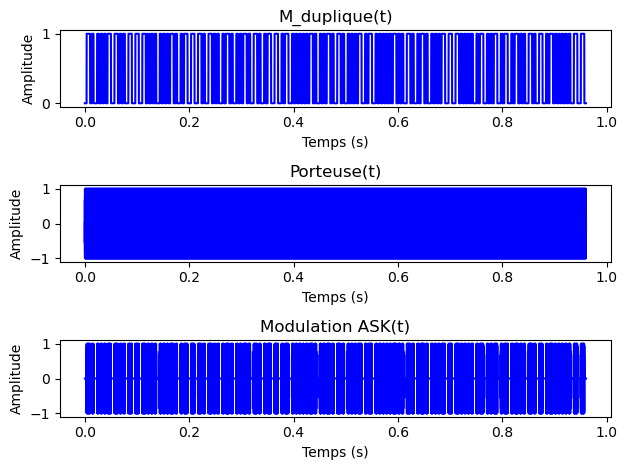

In [6]:
# Afficher le graphique ASK
plt.subplot(3, 1, 1)
plt.plot(t, M_duplique, color='b')
plt.title('M_duplique(t)')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t, Porteuse, color='b')
plt.title('Porteuse(t)')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(t, ASK, color='b')
plt.title('Modulation ASK(t)')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

#### Bloc 6: Enregistrement du Signal Audio Modulé

Ce bloc génère le fichier audio "ASK.wav" à partir du signal modulé et l'enregistre à l'aide de la fonction enregistrer_audio.

In [7]:
# Générer et enregistrer le fichier audio à partir du signal ASK
signal_audio, Fs = générer_signal_audio(t, ASK)
enregistrer_audio("ASK.wav", signal_audio, Fs)

#### Bloc 7: Fonctions pour Décodage et Vérification du Message

Dans ce bloc, trois fonctions sont définies :

    - décoder_manchester: Décode une chaîne Manchester en une chaîne binaire.
    
    - binaire_en_ascii: Convertit une chaîne binaire en ASCII.
    
    - ajouter_crc: Ajoute un code de vérification CRC à une chaîne binaire.

In [8]:
def décoder_manchester(chaine_manchester):
    chaine_binaire = ''
    for i in range(0, len(chaine_manchester), 2):
        if chaine_manchester[i:i + 2] == '01':
            chaine_binaire += '0'
        elif chaine_manchester[i:i + 2] == '10':
            chaine_binaire += '1'
    return chaine_binaire

def binaire_en_ascii(chaine_binaire):
    chaine_ascii = ''.join([chr(int(chaine_binaire[i:i + 8], 2)) for i in range(0, len(chaine_binaire), 8)])
    return chaine_ascii

def ajouter_crc(chaine_binaire):
    crc32 = binascii.crc32(chaine_binaire.encode())
    crc_binaire = format(crc32, '032b')
    return chaine_binaire + crc_binaire

#### Bloc 8: Démodulation ASK et Décodage du Message Reçu

Ce bloc charge le fichier audio "ASK.wav", effectue la démodulation ASK, puis décode le message démodulé.

In [9]:
# Charger le fichier audio
chemin_fichier_audio = "ASK.wav"
signal_audio, Fs = sf.read(chemin_fichier_audio)

# Redéclarer les paramètres nécessaires
Fe = 44100
Fp = 21000
baud = 300
Ns = int(Fe / baud)

# Démodulation ASK
t = np.arange(0, len(signal_audio) / Fs, 1 / Fs)
Porteuse = np.sin(2 * np.pi * Fp * t)
Produit = signal_audio * Porteuse
Résultat = []

for i in range(0, len(signal_audio), Ns):
    Résultat.append(np.trapz(Produit[i:i + Ns]))

# Décodage du message démodulé
message_démodulé_ASK = []

for ii in range(0, len(Résultat)):
    if Résultat[ii] > 0:
        message_démodulé_ASK.append(int(1))
    if Résultat[ii] <= 0:
        message_démodulé_ASK.append(int(0))

#### Bloc 9: Conversion du Message Démodulé en Chaîne Manchester et Décodage

Ce bloc convertit le message démodulé en une chaîne Manchester, puis décode cette chaîne en binaire. Enfin, il ajoute un code CRC pour vérifier l'intégrité du message.

In [10]:
# Convertir le message démodulé en chaîne Manchester
contenu_encodé_manchester = ''.join(map(str, message_démodulé_ASK))

# Décoder le texte Manchester
contenu_binaire_décodé = décoder_manchester(contenu_encodé_manchester)

# Ajouter le CRC au texte décodé
contenu_binaire_décodé_avec_crc = ajouter_crc(contenu_binaire_décodé)

#### Bloc 10: Vérification de l'Intégrité du Message

Ce bloc compare le code CRC reçu avec celui calculé à partir du message décodé pour vérifier l'intégrité du message. Un message est affiché en fonction du résultat.

In [11]:
# Vérifier l'intégrité du message
crc_reçu = contenu_binaire_décodé_avec_crc[-32:]
crc_calculé = format(binascii.crc32(contenu_binaire_décodé.encode()), '032b')

if crc_reçu == crc_calculé:
    print("Le message est intact. Pas d'erreur de transmission.")
else:
    print("Erreur de transmission. Le message peut être corrompu.")

Le message est intact. Pas d'erreur de transmission.


#### Bloc 11: Affichage du Contenu Décodé

Enfin, ce bloc affiche le contenu d'origine décodé du fichier.



In [12]:
# Afficher le contenu original décodé du fichier
contenu_ascii_décodé = binaire_en_ascii(contenu_binaire_décodé)
print("Contenu original décodé du fichier :", contenu_ascii_décodé)

Contenu original décodé du fichier : auxence ca va_"NÓõ


Cela conclut la documentation des différentes étapes du script modulation2. Chaque bloc de code représente une étape spécifique du processus, de la préparation du message à l'affichage des résultats et à la vérification de l'intégrité du message.

### <center><u>Conclusion</u></center>

En conclusion, la mise en œuvre d'un système de communication robuste et fiable est cruciale pour répondre aux besoins du projet, et nous avons pris des décisions stratégiques en choisissant d'intégrer deux fonctionnalités spécifiques parmi les options proposées.

Intégrer un second type de modulation/démodulation apporte une diversité nécessaire pour évaluer différentes approches. Cela offre des avantages en termes de flexibilité et d'adaptabilité à divers scénarios de communication. Le script devra être étendu pour prendre en charge cette nouvelle méthode, avec des ajustements dans les fonctions de modulation, démodulation, et traitement du signal.

L'ajout d'un CRC ou d'un code de correction d'erreur renforce la fiabilité de la communication en permettant la détection et/ou la correction d'erreurs potentielles lors de la transmission. Cela nécessitera une intégration spécifique dans le flux de traitement du message, y compris le calcul, l'ajout, et la vérification du CRC.

### <u>Perspective</u>

Nous avons bien travaillé tous ensemble sur ce livrable. On s’est tous partagé les tâches, puis on a mis en commun.<br> 
A travers ce livrable, nous avons pu apprendre à mieux utiliser Python ainsi que Jupyter de façon efficace et compréhensible.<br><br>
<u>William Moreau-Blanguernon</u> : Notre travail de groupe sur la mise en place de notre Modulation / Démodulation ASK & FSK a été une expérience enrichissante. Chacun d'entre nous a apporté des compétences spécifiques à la table, ce qui a grandement contribué à la qualité globale du livrable. J'ai apprécié la façon dont nous avons pu résoudre les défis techniques ensemble et créer un produit final solide.<br><br>
<u>Louis Mangin</u>: Ce livrable sur la mise en place de notre Modulation / Démodulation ASK & FSK a été un défi passionnant. Le travail d'équipe a été essentiel pour le succès du projet. Chacun d'entre nous a assumé des rôles spécifiques et a travaillé de manière synergique pour élaborer un travail construit.<br><br>
<u>Axel Joly-Levert</u> : Travailler sur la mise en place de notre Modulation / Démodulation ASK & FSK dans le cadre de notre livrable a été une expérience gratifiante. Notre groupe a fait preuve d'une grande collaboration et de compétences techniques pour
concevoir un travail solide. J'ai particulièrement apprécié la manière dont nous avons résolu les problèmes ensemble, en combinant nos connaissances pour atteindre nos objectifs.